In [50]:
import pandas as pd
import pickle

train_df = pd.read_csv("Training.csv")
test_df = pd.read_csv("Testing.csv")
train_df = pd.get_dummies(train_df, columns=['prognosis'], prefix='prognosis')
test_df = pd.get_dummies(test_df, columns=['prognosis'], prefix='prognosis')

missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  
test_df = test_df[train_df.columns]  


X_train = train_df.drop(columns=[col for col in train_df.columns if 'prognosis_' in col])
y_train = train_df.filter(regex='^prognosis_')

X_test = test_df.drop(columns=[col for col in test_df.columns if 'prognosis_' in col])
y_test = test_df.filter(regex='^prognosis_')


In [51]:
symptoms = [col for col in train_df.columns if not col.startswith("prognosis") and col != "Unnamed: 133"]


In [52]:
len(symptoms)

132

In [55]:
symptoms

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [ ]:
import pickle


symptoms_turkish = [
    'Kaşıntı', 'Cilt Döküntüsü', 'Nodüler Cilt Patlamaları', 'Sürekli Hapşırma',
    'Titreme', 'Üşüme', 'Eklem Ağrısı', 'Karın Ağrısı', 'Asitlik', 'Dilde Ülser',
    'Kas Erimesi', 'Kusma', 'İdrarda Yanma', 'İdrarda Lekelenme', 'Yorgunluk',
    'Kilo Alımı', 'Anksiyete', 'Soğuk Eller ve Ayaklar', 'Duygu Durum Değişiklikleri',
    'Kilo Kaybı', 'Huzursuzluk', 'Uyuşukluk', 'Boğazda Lekeler', 'Düzensiz Şeker Seviyesi',
    'Öksürük', 'Yüksek Ateş', 'Çökmüş Gözler', 'Nefes Darlığı', 'Terleme', 'Susuzluk',
    'Hazımsızlık', 'Baş Ağrısı', 'Sararmış Cilt', 'Koyu Renkli İdrar', 'Mide Bulantısı',
    'İştahsızlık', 'Gözlerin Arkasında Ağrı', 'Bel Ağrısı', 'Kabızlık', 'Karın Ağrısı',
    'İshal', 'Hafif Ateş', 'Sarı İdrar', 'Gözlerde Sararma', 'Akut Karaciğer Yetmezliği',
    'Sıvı Fazlalığı', 'Karında Şişlik', 'Şişmiş Lenf Bezleri', 'Halsizlik',
    'Bulanık ve Bozuk Görme', 'Balgam', 'Boğazda Tahriş', 'Göz Kızarıklığı', 'Sinüs Baskısı',
    'Burun Akıntısı', 'Tıkanıklık', 'Göğüs Ağrısı', 'Uzuvlarda Güçsüzlük', 'Hızlı Kalp Atışı',
    'Bağırsak Hareketlerinde Ağrı', 'Anal Bölgedeki Ağrı', 'Kanlı Dışkı', 'Anüste Tahriş',
    'Boyun Ağrısı', 'Baş Dönmesi', 'Kramp', 'Morarma', 'Obezite', 'Şişmiş Bacaklar',
    'Şişmiş Kan Damarları', 'Şişmiş Yüz ve Gözler', 'Büyümüş Tiroit', 'Kırılgan Tırnaklar',
    'Şişmiş Ekstremiteler', 'Aşırı Açlık', 'Evlilik Dışı İlişkiler', 'Kuru ve Karıncalanan Dudaklar',
    'Konuşma Bozukluğu', 'Diz Ağrısı', 'Kalça Eklem Ağrısı', 'Kas Güçsüzlüğü', 'Boyun Tutulması',
    'Şişmiş Eklem', 'Hareket Sertliği', 'Dönme Hareketleri', 'Denge Kaybı', 'Dengesizlik',
    'Vücudun Bir Tarafında Güçsüzlük', 'Koku Kaybı', 'Mesane Rahatsızlığı', 'Kötü Kokulu İdrar',
    'Sürekli İdrara Çıkma Hissi', 'Gaz Çıkışı', 'İç Kaşıntı', 'Toksik Görünüm (Tifüs)', 'Depresyon',
    'Sinirlilik', 'Kas Ağrısı', 'Değişmiş Algı', 'Vücutta Kırmızı Lekeler', 'Karın Ağrısı',
    'Anormal Adet', 'Renksiz Lekeler', 'Gözlerden Yaş Gelmesi', 'Artan İştah', 'Aşırı İdrar Yapma',
    'Aile Geçmişi', 'Mukoid Balgam', 'Paslı Balgam', 'Konsantrasyon Eksikliği', 'Görme Bozuklukları',
    'Kan Nakli Almak', 'Steril Olmayan Enjeksiyon Almak', 'Komada Olma', 'Mide Kanaması',
    'Karında Şişkinlik', 'Alkol Tüketim Geçmişi', 'Sıvı Fazlalığı', 'Balgamda Kan',
    'Baldırda Belirgin Damarlar', 'Çarpıntı', 'Ağrılı Yürüme', 'İrin Dolu Sivilceler',
    'Siyah Noktalar', 'Kabuklanma', 'Cilt Soyulması', 'Gümüş Benzeri Tozlanma',
    'Tırnaklarda Küçük Çukurlar', 'Enflamasyonlu Tırnaklar', 'Kabarcık', 'Burun Etrafında Kızarık Yara',
    'Sarı Kabuklu Akıntı', 'Su İçiyor Musunuz?'
]

with open("symptoms_list_turkish.pkl", "wb") as f:
    pickle.dump(symptoms_turkish, f)


In [60]:
len(symptoms_turkish)

133

In [58]:
symptom_translation

{'itching': 'Kaşıntı',
 'skin_rash': 'Cilt Döküntüsü',
 'nodal_skin_eruptions': 'Nodüler Cilt Patlamaları',
 'continuous_sneezing': 'Sürekli Hapşırma',
 'shivering': 'Titreme',
 'chills': 'Üşüme',
 'joint_pain': 'Eklem Ağrısı',
 'stomach_pain': 'Karın Ağrısı',
 'acidity': 'Asitlik',
 'ulcers_on_tongue': 'Dilde Ülser',
 'muscle_wasting': 'Kas Erimesi',
 'vomiting': 'Kusma',
 'burning_micturition': 'İdrarda Yanma',
 'spotting_ urination': 'İdrarda Lekelenme',
 'fatigue': 'Yorgunluk',
 'weight_gain': 'Kilo Alımı',
 'anxiety': 'Anksiyete',
 'cold_hands_and_feets': 'Soğuk Eller ve Ayaklar',
 'mood_swings': 'Duygu Durum Değişiklikleri',
 'weight_loss': 'Kilo Kaybı',
 'restlessness': 'Huzursuzluk',
 'lethargy': 'Uyuşukluk',
 'patches_in_throat': 'Boğazda Lekeler',
 'irregular_sugar_level': 'Düzensiz Şeker Seviyesi',
 'cough': 'Öksürük',
 'high_fever': 'Yüksek Ateş',
 'sunken_eyes': 'Çökmüş Gözler',
 'breathlessness': 'Nefes Darlığı',
 'sweating': 'Terleme',
 'dehydration': 'Susuzluk',
 'indig

In [53]:
symptoms.append("do you drink water  ? ")

In [54]:
with open("symptoms_list.pkl", "wb") as f:
    pickle.dump(symptoms, f)

In [39]:
semp = pd.read_csv("Training.csv")

In [46]:
a=list(semp.columns)

In [47]:
len(a)

134

In [38]:
train_df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'prognosis_Osteoarthristis', 'prognosis_Paralysis (brain hemorrhage)',
       'prognosis_Peptic ulcer diseae', 'prognosis_Pneumonia',
       'prognosis_Psoriasis', 'prognosis_Tuberculosis', 'prognosis_Typhoid',
       'prognosis_Urinary tract infection', 'prognosis_Varicose veins',
       'prognosis_hepatitis A'],
      dtype='object', length=174)

In [24]:

print(X_train.isnull().sum().sum())  
print(y_train.isnull().sum().sum())  

 
print((X_train == float('inf')).sum().sum())
print((y_train == float('inf')).sum().sum())


4920
0
0
0


In [25]:
X_train = X_train.fillna(0)
y_train = y_train.fillna(0)


In [49]:
X_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0.0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,0.0


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class SymptomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)  # One-Hot Encoded hedef için float32

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


train_dataset = SymptomDataset(X_train, y_train)
test_dataset = SymptomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [27]:
import torch.nn as nn
import torch.nn.functional as F

class PrognosisModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(PrognosisModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, num_classes)  

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)  
        return x

 
input_size = X_train.shape[1]    
num_classes = y_train.shape[1]   
model = PrognosisModel(input_size, num_classes)


In [28]:
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)


,prognosis_(vertigo) Paroymsal Positional Vertigo,prognosis_AIDS,prognosis_Acne,prognosis_Alcoholic hepatitis,prognosis_Allergy,prognosis_Arthritis,prognosis_Bronchial Asthma,prognosis_Cervical spondylosis,prognosis_Chicken pox,prognosis_Chronic cholestasis,...,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
X_train.shape

(4920, 133)

In [29]:
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        
        
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

       
        _, predicted = torch.max(outputs, 1)
        _, labels = torch.max(y_batch, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100. * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")


Epoch [1/20], Loss: 0.2812, Accuracy: 3.48%
Epoch [2/20], Loss: 0.1071, Accuracy: 30.55%
Epoch [3/20], Loss: 0.0689, Accuracy: 76.08%
Epoch [4/20], Loss: 0.0296, Accuracy: 99.04%
Epoch [5/20], Loss: 0.0106, Accuracy: 99.96%
Epoch [6/20], Loss: 0.0042, Accuracy: 100.00%
Epoch [7/20], Loss: 0.0021, Accuracy: 100.00%
Epoch [8/20], Loss: 0.0013, Accuracy: 100.00%
Epoch [9/20], Loss: 0.0008, Accuracy: 100.00%
Epoch [10/20], Loss: 0.0006, Accuracy: 100.00%
Epoch [11/20], Loss: 0.0004, Accuracy: 100.00%
Epoch [12/20], Loss: 0.0003, Accuracy: 100.00%
Epoch [13/20], Loss: 0.0003, Accuracy: 100.00%
Epoch [14/20], Loss: 0.0002, Accuracy: 100.00%
Epoch [15/20], Loss: 0.0002, Accuracy: 100.00%
Epoch [16/20], Loss: 0.0001, Accuracy: 100.00%
Epoch [17/20], Loss: 0.0001, Accuracy: 100.00%
Epoch [18/20], Loss: 0.0001, Accuracy: 100.00%
Epoch [19/20], Loss: 0.0001, Accuracy: 100.00%
Epoch [20/20], Loss: 0.0001, Accuracy: 100.00%


In [30]:
import numpy as np


In [ ]:
model.eval()
test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        
        loss = criterion(outputs, y_batch)
        test_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        _, labels = torch.max(y_batch, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100. * correct / total
print(f"Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {accuracy:.2f}%")


Test Loss: 0.0164, Test Accuracy: 97.62%


'1.23.5'

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        
        
        _, predicted = torch.max(outputs, 1)
        _, labels = torch.max(y_batch, 1)  

        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


all_preds = np.array(all_preds)
all_labels = np.array(all_labels)


In [ ]:

class_names = y_train.columns


In [ ]:
import torch
import pickle


model_data = {
    'model_state_dict': model.state_dict(),
    'input_size': input_size,
    'num_classes': num_classes,
    'class_names': list(y_train.columns) 
}


with open('prognosis_model_with_class_names.pkl', 'wb') as f:
    pickle.dump(model_data, f)


In [ ]:
with open('prognosis_model_with_class_names.pkl', 'rb') as f:
    model_data = pickle.load(f)

model = PrognosisModel(input_size=model_data['input_size'], num_classes=model_data['num_classes'])
model.load_state_dict(model_data['model_state_dict'])
model.eval()  

class_names = model_data['class_names']
print("Class names:", class_names)

Class names: ['prognosis_(vertigo) Paroymsal  Positional Vertigo', 'prognosis_AIDS', 'prognosis_Acne', 'prognosis_Alcoholic hepatitis', 'prognosis_Allergy', 'prognosis_Arthritis', 'prognosis_Bronchial Asthma', 'prognosis_Cervical spondylosis', 'prognosis_Chicken pox', 'prognosis_Chronic cholestasis', 'prognosis_Common Cold', 'prognosis_Dengue', 'prognosis_Diabetes ', 'prognosis_Dimorphic hemmorhoids(piles)', 'prognosis_Drug Reaction', 'prognosis_Fungal infection', 'prognosis_GERD', 'prognosis_Gastroenteritis', 'prognosis_Heart attack', 'prognosis_Hepatitis B', 'prognosis_Hepatitis C', 'prognosis_Hepatitis D', 'prognosis_Hepatitis E', 'prognosis_Hypertension ', 'prognosis_Hyperthyroidism', 'prognosis_Hypoglycemia', 'prognosis_Hypothyroidism', 'prognosis_Impetigo', 'prognosis_Jaundice', 'prognosis_Malaria', 'prognosis_Migraine', 'prognosis_Osteoarthristis', 'prognosis_Paralysis (brain hemorrhage)', 'prognosis_Peptic ulcer diseae', 'prognosis_Pneumonia', 'prognosis_Psoriasis', 'prognosis_

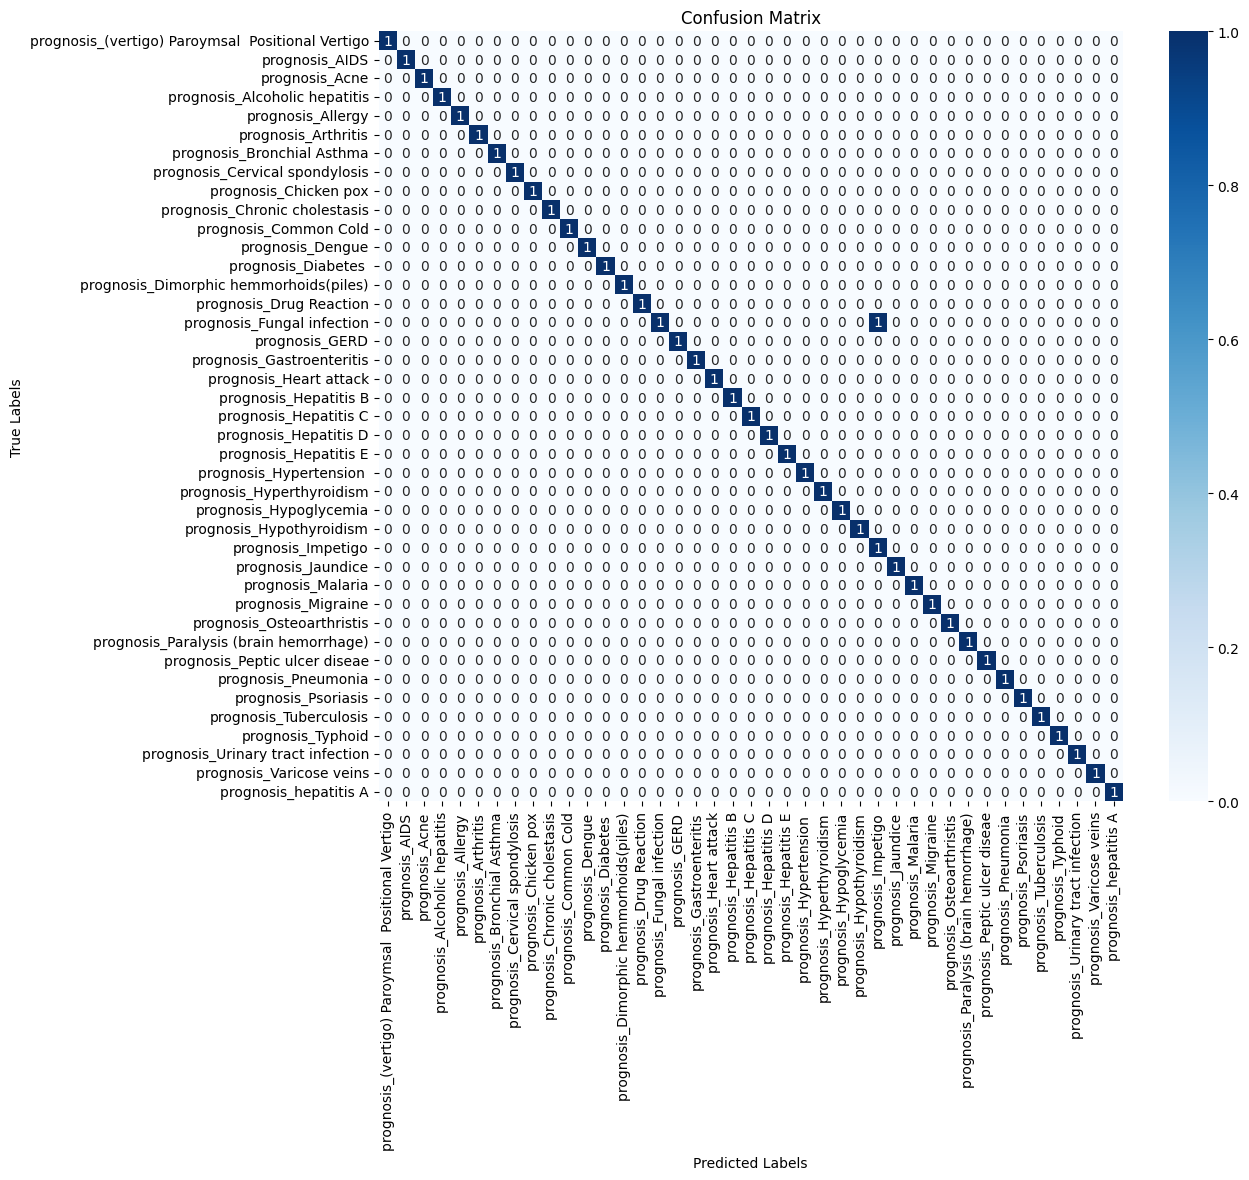

In [ ]:
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



In [ ]:
import torch
torch.save(model.state_dict(), "prognosis_model.pth")


In [ ]:
import torch
import pickle

model_data = {
    'model_state_dict': model.state_dict(),
    'input_size': input_size,
    'num_classes': num_classes
}

with open('prognosis_model2.pkl', 'wb') as f:
    pickle.dump(model_data, f)
